In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/projet
!ls

/content/drive/MyDrive/projet
projet_traffic_signs_detection	yolo11n.pt  yolov8m.pt


In [ ]:
!git clone https://github.com/houdaahmitti/projet_traffic_signs_detection.git
%cd projet_traffic_signs_detection
!ls


fatal: destination path 'projet_traffic_signs_detection' already exists and is not an empty directory.
/content/drive/MyDrive/projet/projet_traffic_signs_detection
projet_traffic_signs_detection


In [ ]:
!pip install torch torchvision opencv-python matplotlib pandas tqdm ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.5 MB/s eta 0:00:00


In [ ]:
!python /content/drive/MyDrive/projet/projet_traffic_signs_detection/src/dataset.py


✅ Conversion YOLO terminée pour train dataset
✅ Conversion YOLO terminée pour val dataset


In [ ]:
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install -q ultralytics



In [ ]:
import torch
print(torch.cuda.is_available())  # True si GPU détecté
print(torch.cuda.get_device_name(0))  # Nom du GPU


True
Tesla T4


In [ ]:
!python /content/drive/MyDrive/projet/projet_traffic_signs_detection/src/train.py


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
⚡ Training will run on device: 0
GPU detected: Tesla T4
🚀 Loading YOLOv8m model...
⚡ Starting training...
Ultralytics 8.3.250 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/projet/projet_traffic_signs_detection/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, fli

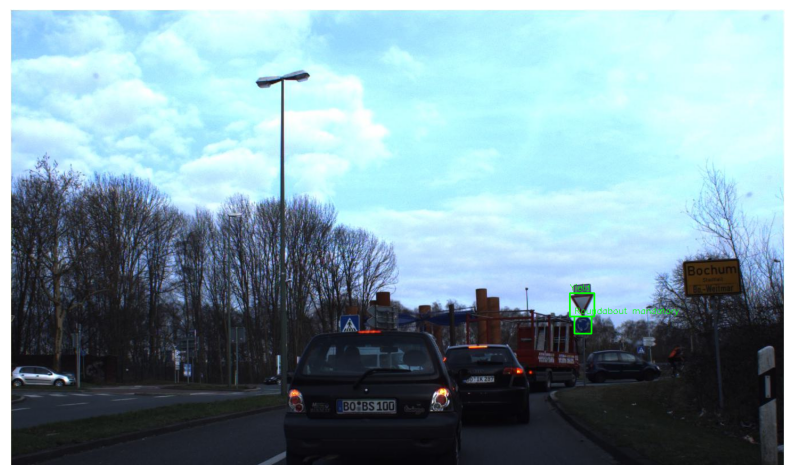

In [ ]:
import cv2
from matplotlib import pyplot as plt

# charger image
img = cv2.imread("/content/drive/MyDrive/projet/projet_traffic_signs_detection/data/images/val/00479.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convertir BGR -> RGB pour matplotlib

boxes = [
    (982, 498, 1025, 539, "Yield"),
    (990, 539,1020,569, "Roundabout mandatory")
]

# dessiner les boîtes
for xmin, ymin, xmax, ymax, label in boxes:
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(img, label, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# afficher image
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()



image 1/1 /content/drive/MyDrive/projet/projet_traffic_signs_detection/data/images/val/00479.jpg: 384x640 1 Yield, 1 Roundabout mandatory, 25.7ms
Speed: 2.3ms preprocess, 25.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


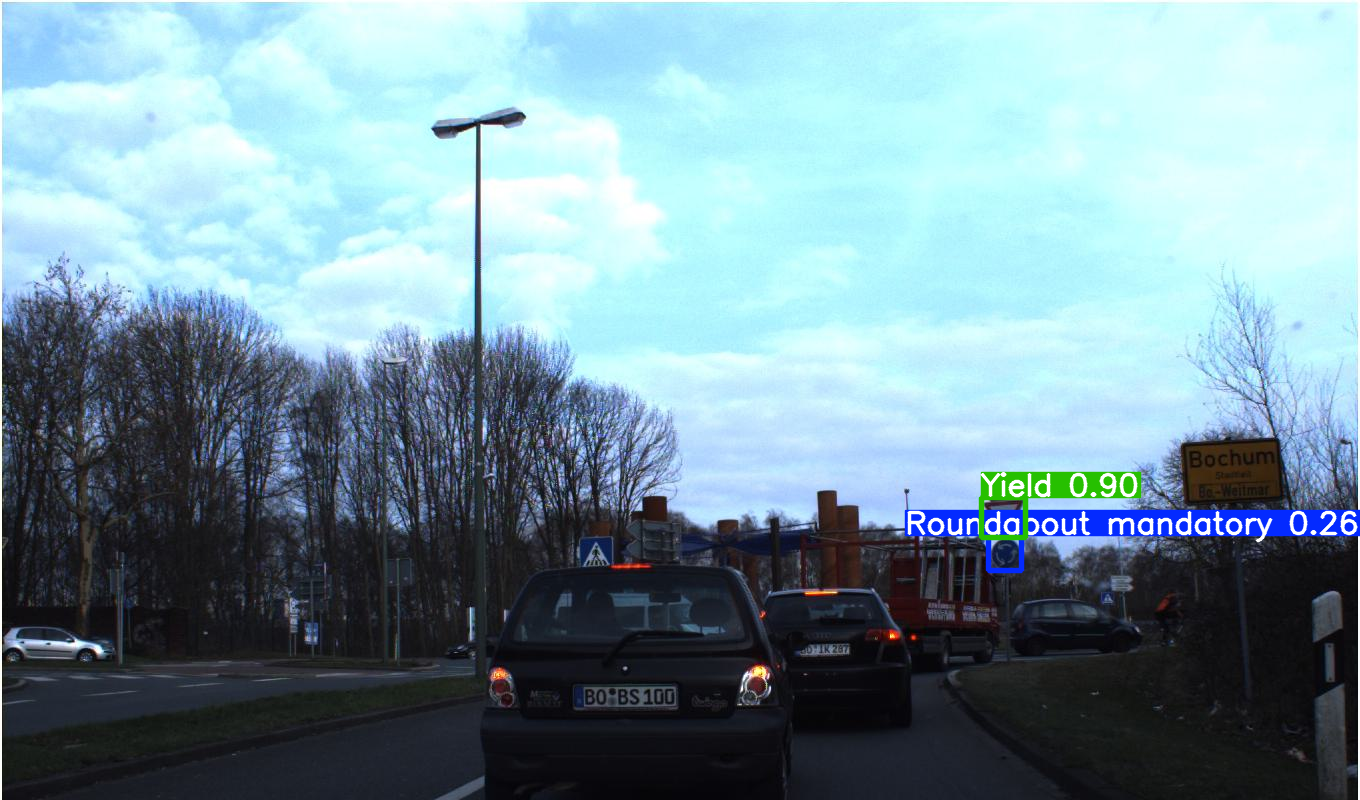

In [ ]:
from ultralytics import YOLO

# Charger le modèle
model = YOLO("/content/drive/MyDrive/projet/projet_traffic_signs_detection/runs/train/train_signs43/weights/best.pt")

# Chemin de l'image
img_path = "/content/drive/MyDrive/projet/projet_traffic_signs_detection/data/images/val/00479.jpg"

# Faire la prédiction
results = model(img_path)  # results est une liste avec 1 élément

# Afficher les boîtes détectées
results[0].show()  # accéder au premier élément de la liste



In [ ]:
!python /content/drive/MyDrive/projet/projet_traffic_signs_detection/src/predict.py

🔍 Loading trained model...
📸 Running prediction on image...

image 1/1 /content/drive/MyDrive/projet/projet_traffic_signs_detection/data/images/val/00500.jpg: 480x768 1 Speed limit (80km/h), 46.2ms
Speed: 3.2ms preprocess, 46.2ms inference, 16.0ms postprocess per image at shape (1, 3, 480, 768)
Results saved to /content/drive/MyDrive/projet/projet_traffic_signs_detection/runs/detect/test_sign3
✅ Prediction finished!
